/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


== Best SVM Model (Top 12 Features) ==
Accuracy: 0.8104956268221575
AUC: 0.8481080631376733
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       498
           1       0.83      0.80      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



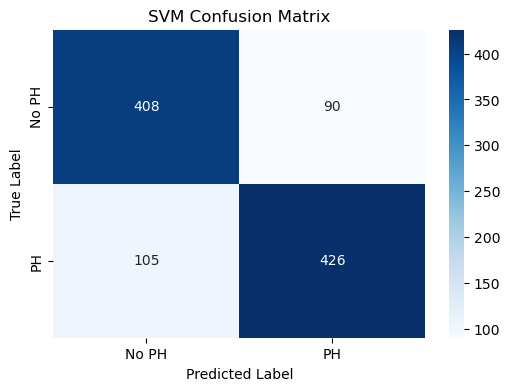

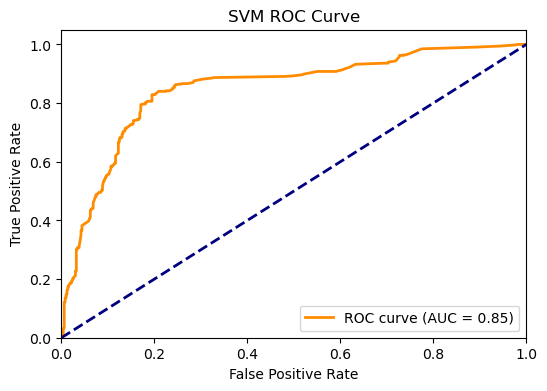

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# 1. Load and preprocess data
df = pd.read_csv("Matched_Cohort.csv")

# Encode 'Sex' and 'Ethnicity'
label_encoders = {}
for col in ['Sex', 'Ethnicity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Define Top 12 SHAP features
top_12_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease',
    'Chronic kidney disease',
    'Asthma',
    'Sleep apnoea'
]

# 3. Split into features and target
X = df[top_12_features]
y = df["PH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define and train best SVM model
best_svm = SVC(C=1, kernel="rbf", probability=True, random_state=42)
best_svm.fit(X_train, y_train)

# 5. Evaluate performance
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]

print("== Best SVM Model (Top 12 Features) ==")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

# 7. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [2]:
import shap

# Sample training data for background (to speed up KernelExplainer)
background = shap.sample(X_train, 100, random_state=42)

# Sample test data to explain
X_test_sample = shap.sample(X_test, 100, random_state=42)

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
  1%|          | 1/100 [00:48<1:19:42, 48.30s/it]/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWar

SHAP values shape: (100, 12)
X_test_sample shape: (100, 12)


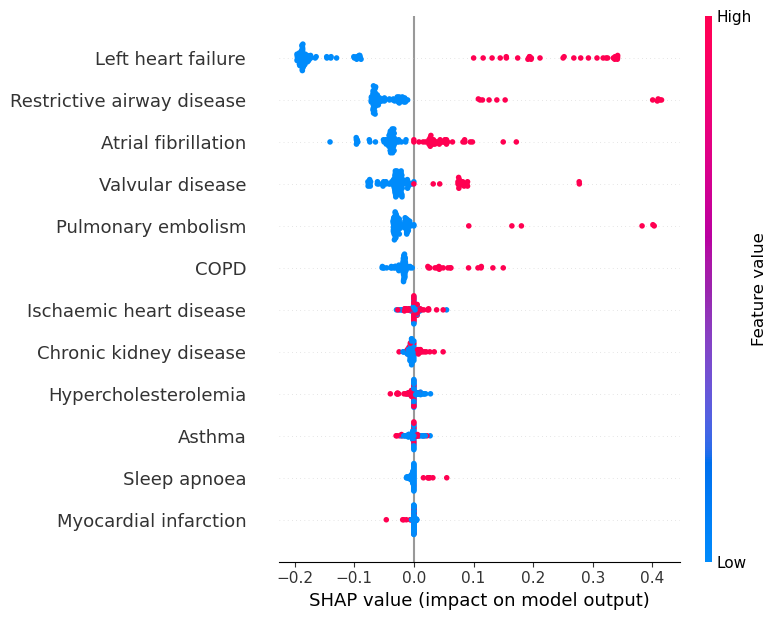

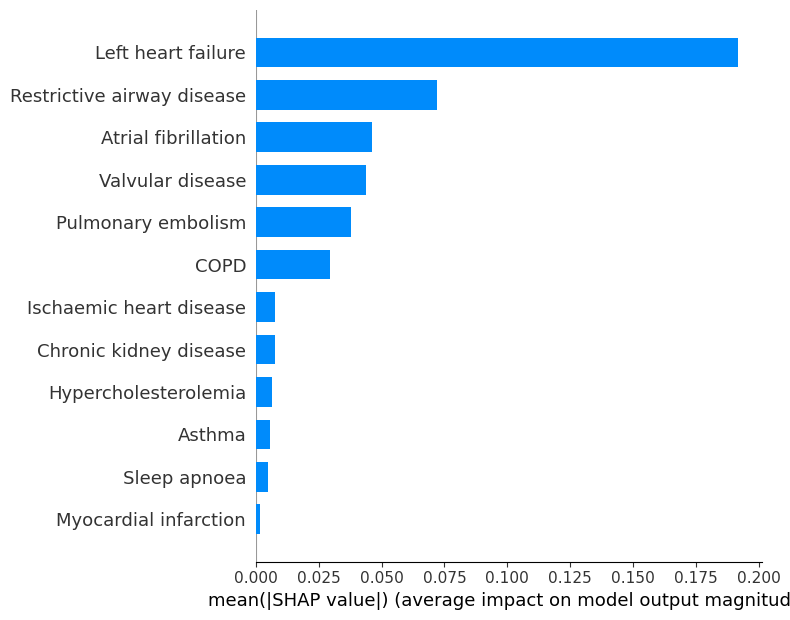

In [4]:
import shap

# Sample background and test data
background = shap.sample(X_train, 100, random_state=42)
X_test_sample = shap.sample(X_test, 100, random_state=42)

# Use only class 1 probability
explainer = shap.KernelExplainer(lambda x: best_svm.predict_proba(x)[:, 1], background)

# Calculate SHAP values (no class dimension now)
shap_values = explainer.shap_values(X_test_sample)

# Confirm shape (should be [100, 12])
print("SHAP values shape:", shap_values.shape)
print("X_test_sample shape:", X_test_sample.shape)

# Plot
shap.summary_plot(shap_values, X_test_sample)  # Beeswarm
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")  # Bar

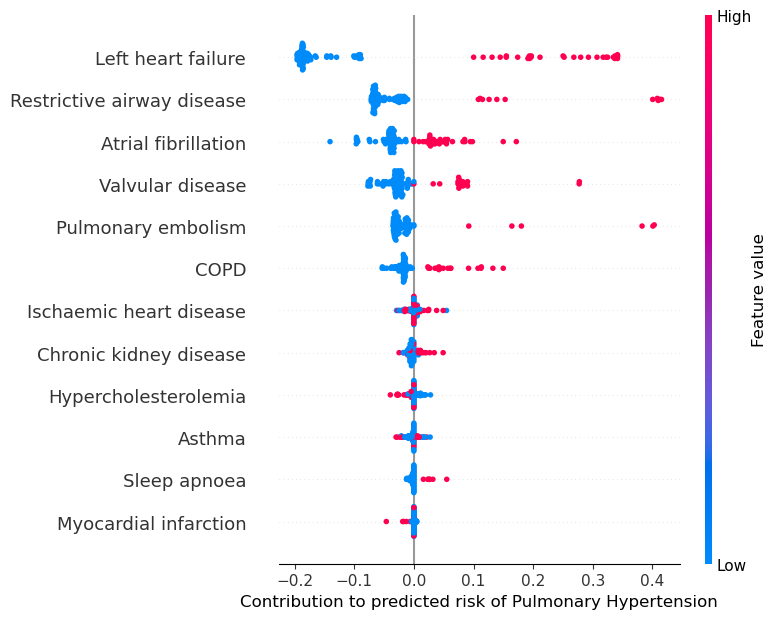

In [11]:
import shap
import matplotlib.pyplot as plt

# Create the plot but DO NOT render it yet
shap.summary_plot(shap_values, X_test_sample, show=False)

# Get current axis and set label
ax = plt.gca()
ax.set_xlabel("Contribution to predicted risk of Pulmonary Hypertension", fontsize=12)

# Improve layout and show
plt.tight_layout()
plt.show()

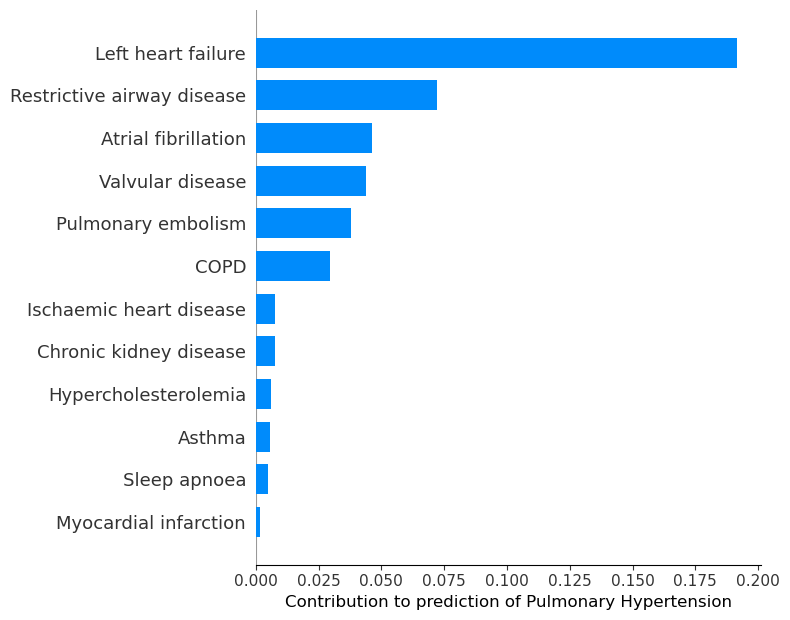

In [19]:
import shap
import matplotlib.pyplot as plt

# Generate the SHAP bar plot but suppress auto-showing
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)

# Get current axis and update label
ax = plt.gca()
ax.set_xlabel("Contribution to prediction of Pulmonary Hypertension", fontsize=12)

# Render cleanly
plt.tight_layout()
plt.show()

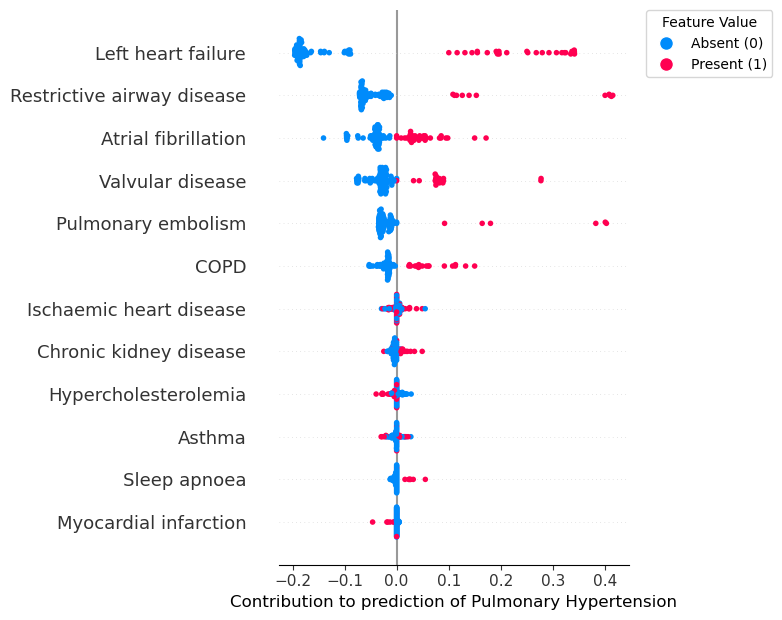

In [18]:
import shap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot the SHAP beeswarm (suppress color bar and auto-show)
shap.summary_plot(
    shap_values,
    X_test_sample,
    color=feature_values_binary,
    color_bar=False,
    show=False
)

# Define exact SHAP dot colors for binary values
color_absent = '#008bfb'   # Blue for 0
color_present = '#ff0051'  # Red for 1

# Custom binary legend using exact colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Absent (0)', markerfacecolor=color_absent, markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Present (1)', markerfacecolor=color_present, markersize=10)
]

# Position legend neatly outside
plt.legend(
    handles=legend_elements,
    title='Feature Value',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Update axis label
plt.xlabel("Contribution to prediction of Pulmonary Hypertension", fontsize=12)
plt.tight_layout()
plt.show()
